# import

In [15]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def extend_line(point1, point2, extend_direction):
    # Calculate the slope of the line
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])

    # Calculate the new coordinates
    if extend_direction == "positive":
        new_x = point2[0] + 0.4 * (point2[0] - point1[0])
        new_y = point2[1] + 0.4 * (point2[1] - point1[1])
    elif extend_direction == "negative":
        new_x = point1[0] - 0.3 * (point2[0] - point1[0])
        new_y = point1[1] - 0.3 * (point2[1] - point1[1])
    else:
        raise ValueError("Invalid extend direction. Must be 'positive' or 'negative'.")

    return [(point1[0], point1[1]), (point2[0], point2[1]), (new_x, new_y)]




# set paths

In [16]:

atlas_path = os.getcwd() + r'\reference_images\reference_25um_inverted.tif'
cp_image_path = os.getcwd() + r'\reference_images\sagital_reference_25um_inverted.tif'
file_path = os.getcwd() + r'\example_data\probe_positions.txt'

#load in probe tip location data
coords = pd.read_csv(file_path, header=0)

# 

In [17]:
# add the striatum limits
z_limits = [190, 200]
y_limits = [60, 271]

# select number of slices to show, rows and cols
n_images = 3
rows = 1
cols = 3

# define colors
color_1 = '#BF5860' 
color_2 = '#56BEC1'

color_other = 'white'

# plot with a different marker the flat fibers and the tapered fibers
ff_marker = '_'
tf_marker = 'o'



fp = Path(file_path)
parent = fp.parent

# read the file of points
X1 = coords.x1
Y1 = coords.y1
Z1 = coords.z1
X2 = coords.x2
Y2 = coords.y2
Z2 = coords.z2
Animal_Name = coords.Mouse_name

# select only the fibers used in the analysis
X1 = np.array(list(X1)).astype(float)
Y1 = np.array(list(Y1)).astype(float)
Z1 = np.array(list(Z1)).astype(float)
X2 = np.array(list(X2)).astype(float)
Y2 = np.array(list(Y2)).astype(float)
Z2 = np.array(list(Z2)).astype(float)
Animal_Name = np.array(list(Animal_Name))

# read atlas get slice numbers
atlas = Image.open(atlas_path)
h,w = np.shape(atlas)
# decide on the number of images
step = int(np.floor((z_limits[1] - z_limits[0]) / n_images))
sl_list = list(range(z_limits[0], z_limits[1], step))
sl_list = sl_list[-n_images:]

# Mirror all to the right hemisphere
atlas_mid_point = w/2
for i in range(len(X1)):
    if X1[i] < atlas_mid_point:
        dist_to_center = atlas_mid_point - X1[i]
        X1[i] = atlas_mid_point + dist_to_center
for i in range(len(X2)):
    if X2[i] < atlas_mid_point:
        dist_to_center = atlas_mid_point - X2[i]
        X2[i] = atlas_mid_point + dist_to_center
        
for i in range(len(X1)):
    X1[i] = X1[i]-7
for i in range(len(Y2)):
    X2[i] = X2[i]-7

groups = list(coords.group.values)

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_2616\1518078900.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a, fontsize=18)
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_2616\1518078900.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(a, fontsize=18)


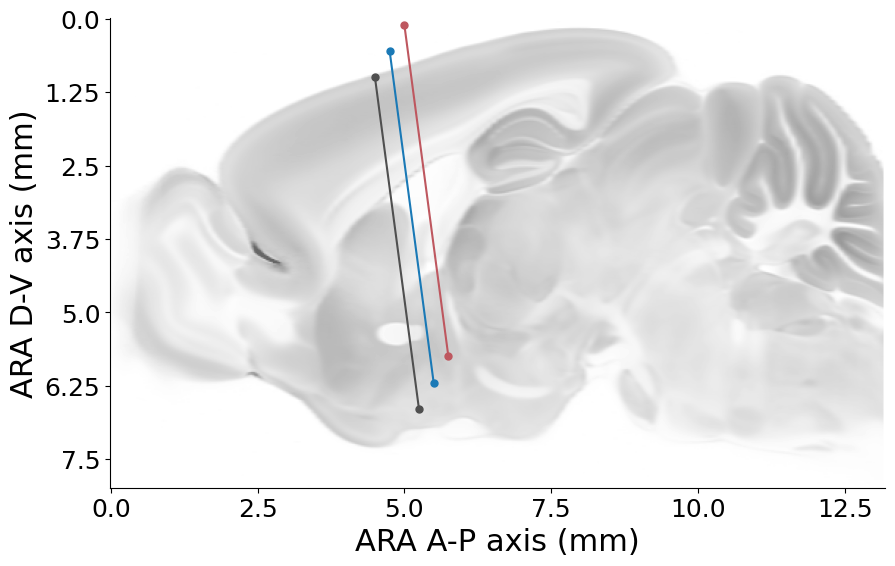

In [ ]:
colours_ = ['buffer','#BE575F','#1A79B6','#4F4F4F','k']

# make the plot
fig, ax = plt.subplots(1, 1, figsize=[10,10])
# show striatum outline
str_im = Image.open(cp_image_path)
ax.imshow(str_im, cmap='gray',alpha = 0.6)

for i in range(len(X1)):
    new_point = extend_line((Z1[i],Z2[i]),(Y1[i],Y2[i]),'positive')
#     ax.plot((Z1[i], Z2[i]),(Y1[i],Y2[i]), '-', color=colours_[groups[i]],
#             alpha=1, markersize=10, markeredgewidth=1)
    if not groups[i] == 4:
        ax.plot(new_point[0], new_point[-1], 'o-', color=colours_[groups[i]],
                alpha=1, markersize=5, markeredgewidth=1)

    
    
# add limits of striatum
a=ax.get_xticks().tolist()
a= [25 * a[i] / 1000 for i in range(len(a))]
ax.set_xticklabels(a, fontsize=18)
a=ax.get_yticks().tolist()
a= [25 * a[i] / 1000 for i in range(len(a))]
ax.set_yticklabels(a, fontsize=18)
ax.set_xlabel('ARA A-P axis (mm)', fontsize=22)
ax.set_ylabel('ARA D-V axis (mm)', fontsize=22)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)



In [ ]:
def extend_line(point1, point2, extend_direction):
    # Calculate the slope of the line
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])

    # Calculate the new coordinates
    if extend_direction == "positive":
        new_x = point2[0] + 0.2 * (point2[0] - point1[0])
        new_y = point2[1] + 0.2 * (point2[1] - point1[1])
    elif extend_direction == "negative":
        new_x = point1[0] - 0.3 * (point2[0] - point1[0])
        new_y = point1[1] - 0.3 * (point2[1] - point1[1])
    else:
        raise ValueError("Invalid extend direction. Must be 'positive' or 'negative'.")

    return [(point1[0], point1[1]), (point2[0], point2[1]), (new_x, new_y)]

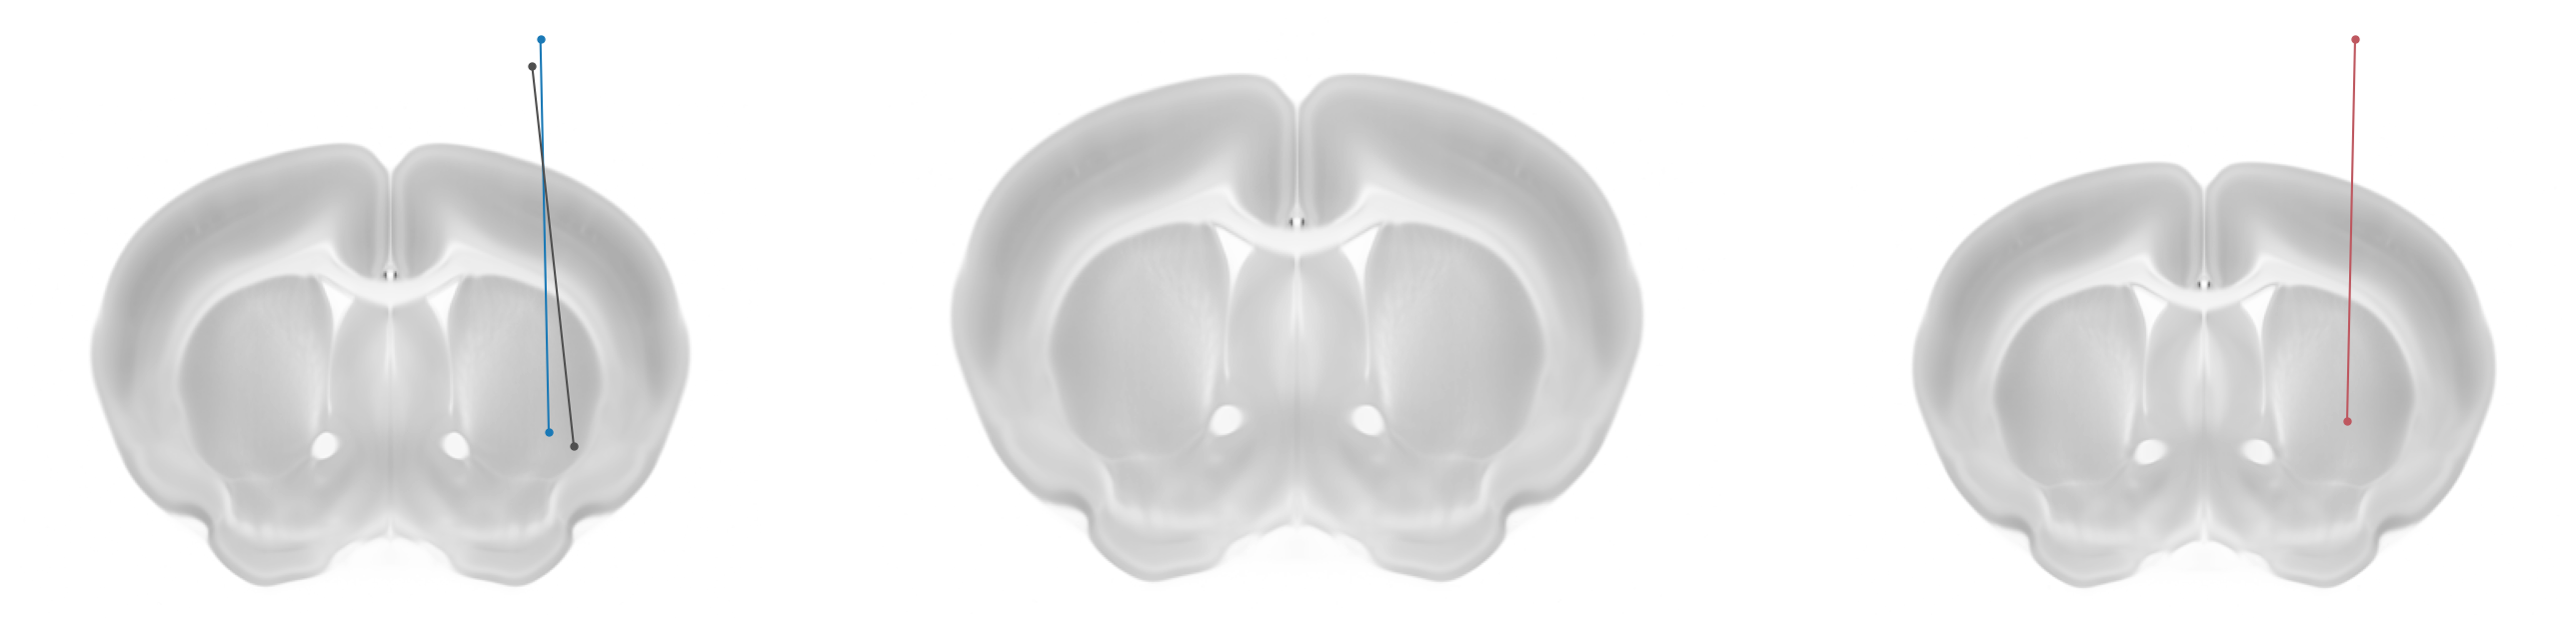

In [19]:
# plot the fibers in the slices
fig2, axs = plt.subplots(rows, cols, figsize=[cols * w/50, rows * h/50])
axs = axs.ravel()
for c,i in enumerate(sl_list):
    atlas.seek(i)
    axs[c].imshow(atlas, cmap='gray',alpha = 0.6)
    axs[c].axis('off')
# fig2.subplots_adjust(wspace=0, hspace=0)
fig2.tight_layout()

# plot the fibers
for c,x in enumerate(Z1):
    # find the index of the slice that this point is closest to
    templist = [np.abs(b - x) for b in sl_list]
    idx = np.argmin(templist)
    new_point = extend_line((X1[c],X2[c]),(Y1[c],Y2[c]),'positive')
    if not groups[c] == 4:
        axs[idx].plot(new_point[0], new_point[-1], 'o-', color=colours_[groups[c]],
                alpha=1, markersize=5, markeredgewidth=1)
        
